# Descriptive Statistics
Materi ke-9 dalam Course Introduction to Python For Data Science

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
x=[8.0, 1, 2.5, 4, 28.0]
x_with_nan=[8.0, 1, 2.5,math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Measure of Central Tendency

- mean
- modus
- median
- weighted mean
- geometric mean
- harmonic mean 

### mean

In [4]:
mean_ = sum(x) / len(x)
mean_

8.7

In [5]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [6]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [7]:
# jika kita menggunakan numpy
mean_=np.mean(y)
mean_

8.7

In [8]:
mean_=y.mean()
mean_

8.7

In [9]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [10]:
# jika kita ingin mengabaikan nilai nan 
np.nanmean(y_with_nan)

8.7

In [11]:
#jika kita menggunakan pandas 
mean_=z.mean()
mean_

8.7

In [12]:
z_with_nan.mean()

8.7

In [13]:
# pandas secara default akan mengabaikan nilai nan 

### weighted mean
generalisasi dari rata rata aritmatika yang memungkinkan kita untuk menentukan kontribusi relatif dari setiap titik data ke hasil

In [14]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

In [15]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)
# kita bisa menggunakan for looping dengan mengkombinasikan dengan sum(), range(), atau zip()

6.95
6.95


In [16]:
# kita bisa menggunakan numpy untuk mencari weighted mean dengan np.avarage(), kita juga bisa lakukan dalam bentuk pandas series
y, z, w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


In [17]:
# hasilnya akan sama saja dengan 
(w * y).sum() / w.sum()

6.95

### harmonic mean
merupakan reciprocal dari mean dari semua item dalam dataset 𝑛 / Σᵢ(1/𝑥ᵢ), where 𝑖 = 1, 2, …, 𝑛 dimana 𝑛 adalah jumlah item dari dataset 𝑥. contoh dari harmonic mean adalah untuk menghitung rata rata keccepatan kita saat berkendara

In [18]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [19]:
sum(x)/len(x)

8.7

In [20]:
# hal ini cukup berbeda dengan kita menghitung mean dengan cara biasa, kita bisa juga menggunakan library yang disediakan untuk mencar harmonic mean 

In [21]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [22]:
scipy.stats.hmean(y)

2.7613412228796843

In [23]:
scipy.stats.hmean(z)

2.7613412228796843

### geometric mean
akar ke-n dari hasil kali semua elemen 𝑥ᵢ dalam dataset 𝑥: ⁿ√(Πᵢ𝑥ᵢ), dimana 𝑖 = 1, 2, …, 𝑛.

In [24]:
gmean = 1

for item in x:
    gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

In [25]:
# kita juga bisa menggunakan scipy.stats.gmean()

In [26]:
scipy.stats.gmean(y)

4.67788567485604

In [27]:
scipy.stats.gmean(z)

4.67788567485604

### median 
nilai tengah dari suatu data

In [28]:
#jika kita menggunakan implementasi pure dari python
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

4

In [29]:
print(x)
print(statistics.median_low(x[:-1]))
print(statistics.median_high(x[:-1]))
# yang kita cari adalah median dari data [1, 2.5, 4, 8.0], karena x[:-1]

[8.0, 1, 2.5, 4, 28.0]
2.5
4


In [30]:
#tidak seperti pustaka lain, median(), median_low(), ataupun median_high() tidak mengembalikan nilai nan
print(x_with_nan)
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

[8.0, 1, 2.5, nan, 4, 28.0]
6.0
4
8.0


In [31]:
#kita juga bisa menggunakn numpy untuk mencari median 
median_ = np.median(y)
print(median_)

4.0


In [32]:
median_ = np.median(y[:-1])
print(median_)

3.25


### mode / modus
nilai yang paling sering muncul dari suatu data

In [33]:
# jika kita menggunakan pure python
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [34]:
# jika kita menggunakan statistics.mode()
mode_ = statistics.mode(u)
mode_

2

In [35]:
# jika kita menggunnakan scipy
u, v = np.array(u), np.array(v)
mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [36]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

In [37]:
print(mode_.mode)
print(mode_.count)

[12]
[3]


In [38]:
# pandas series punya metode mode( ) yang menangani nilai multimodal dan mengabaikan nilai nan secara default
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
print(u.mode())
print(v.mode())
print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


## Measure of Variability
- Variance
- Standard deviation
- Skewness
- Percentiles
- Ranges


### variance
variance digunakan untuk mengukur persebaran data dari titik mean. secara matematis 𝑠² = Σᵢ(𝑥ᵢ − mean(𝑥))² / (𝑛 − 1), dimana 𝑖 = 1, 2, …, 𝑛 dan mean(𝑥) adalah mean dari sample 𝑥.

In [39]:
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

In [40]:
var_ = statistics.variance(x)
var_

123.2

In [41]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [42]:
var_ = y.var(ddof=1) #ddof merupakan derajat kebebasan 
var_

123.19999999999999

In [43]:
z.var(ddof=1) #objek pd.series memiliki metode var() dengan mengabaikan nilai nan secara default

123.19999999999999

### standart deviation

 standard deviation merupakan cara lain untuk mengukur penyebaran data. Berhubungan dengan variance sample, karena standart deviaton,s, adalah hasil dari positive square root dari sample variance

In [44]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [45]:
#kita bisa melakukan dengan statisctis.stdev
std_ = statistics.stdev(x)
std_

11.099549540409287

In [46]:
#kita bisa menggunakan numpy 
np.std(y, ddof=1)

11.099549540409285

In [47]:
y.std(ddof=1)

11.099549540409285

In [48]:
# dengan menggunakan pd series
y.std(ddof=1)

11.099549540409285

### skewness
skewness mengukur asimetri dari sample data. 

In [49]:
# kita dapat menghitung skewness dengan pure python
# sebelum menghitung skewness pastikan kita telah menghitung
#ukuran kumpulan data n
# sample mean
# dan standart deviaton
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_ ** 0.5
skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))

In [50]:
skew_

1.9470432273905929

In [51]:
#jika hasilya positif maka x memiliki right side tail


In [52]:
#kita juga bisa menghitung dengan scipy
y, y_with_nan = np.array(x), np.array(x_with_nan)
scipy.stats.skew(y, bias=False)

1.9470432273905927

In [53]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [54]:
#parameter bias diset false agar mengaktifkan koreksi bias statistik

In [55]:
#untuk pd series
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew()

1.9470432273905924

In [56]:
z_with_nan.skew()

1.9470432273905924

### percentile
**sampel p percentil** merupakan elemen dari kumpulan data sehingga p% elemen dalam kumpulan data kurang dari atua sama dengan nilai tersebut. terdapat tiga quartil yang membagi dataset menjadi 4 bagian 
- first quartile (sample persentil ke 25)
- second quartile (sample persentil ke 50)
- third quartile (sample persentil ke 75)

In [57]:
y = np.array(x)

In [58]:
np.percentile(y, 5)

1.3

In [59]:
np.percentile(y, 95)

23.999999999999996

In [60]:
np.percentile(y, 95)

23.999999999999996

In [61]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
y = np.array(x)

In [62]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [63]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [64]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [65]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [66]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.95)

34.919999999999995

In [67]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [68]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

### range

perbedaan antara elemen maksimum dan minimum dalam kumpulan data. kita dapat menggunakan np.ptp()

In [69]:
np.ptp(y)

46.0

In [70]:
np.ptp(z)

46.0

In [71]:
y.max() - y.min()

46.0

In [72]:
np.ptp(y_with_nan)

nan

In [73]:
np.ptp(z_with_nan)

nan

## Summmary of Descriptive Statistics

scipy dan pandas terdapat function yang berguna untuk mendapatkan deskriptif statistik dengan cepat hanya dengan 1 panggilan. 

In [74]:
result=scipy.stats.describe(y,ddof=1,bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [75]:
#dengan menggunakan pandas 
result=z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

## Measures of Correlation Between Pairs of Data

 kita akan melihat measures of correlation 
 - positive correlation 
 - negative correlation
 - weak or no correlation exists
 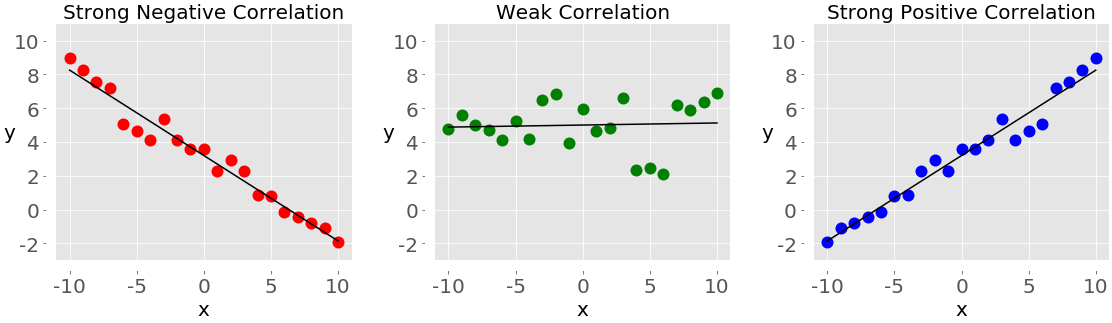

In [76]:
x = list(range(-10, 11))
print(x)
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
print(y)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]


In [77]:
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

### covariance
merupakan ukuran yang mengukur kekuatan dan arah hubungan dari sepasang variable
- jika korelasi positif : covariance positif, dan hubungan yang kuat sehubungan tingginya nilai dari covariance
- jika korelasi negatif : covariance negatif, hubungan yang kuat mengikuti higher absolute dari nilai covariance
- jika korelasi lemah : nilai kovarian mendekati nol

In [78]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
cov_xy

19.95

In [79]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [80]:
x_.var(ddof=1)

38.5

In [81]:
y_.var(ddof=1)

13.914285714285711

In [82]:
# dengan menggunakan pandas 
cov_xy = x__.cov(y__)
cov_xy 

19.95

In [83]:
cov_xy = y__.cov(x__)
cov_xy

19.95

### correlation coeffcienct

In [84]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

Kita mendapatkan variabel r yang mewakili correlation coefficient.


In [85]:
r, p = scipy.stats.pearsonr(x_, y_)
print(r)
print(p)

0.8619500056316058
5.122760847201207e-07


In [86]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [87]:
#Kita bisa mendapatkan correlation coefficient dengan scipy.stats.linregress():
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [88]:
# dengan menggunakan pd series
r=x__.corr(y__)

In [89]:
r

0.8619500056316061

In [90]:
r=y__.corr(x__)

In [91]:
r

0.861950005631606

## working with 2D data

### axes

In [92]:
a = np.array([[1, 1, 1],
               [2, 3, 1],
               [4, 9, 2],
               [8, 27, 4],
               [16, 1, 1]])
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [93]:
np.mean(a)
a.mean()
np.median(a)
a.var(ddof=1)

53.40000000000001

In [94]:
np.mean(a, axis=0)
a.mean(axis=0)

array([6.2, 8.2, 1.8])

In [95]:
np.mean(a, axis=1)
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [96]:
np.median(a, axis=0)

array([4., 3., 1.])

In [97]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [98]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [99]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

In [100]:
# menggunakan scipy
scipy.stats.gmean(a)  # Default: axis=0

array([4.        , 3.73719282, 1.51571657])

In [102]:
 scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [103]:
scipy.stats.gmean(a, axis=None) # untuk statistik seluruh dataset

2.829705017016332

In [104]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [105]:
scipy.stats.describe(a, ddof=1, bias=False)  # Default: axis=0


DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [106]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)


DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

In [107]:
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean #mendapatkan nilai tertentu dari ringkasan

array([ 1.,  2.,  5., 13.,  6.])

In [108]:
# Dataframes

In [109]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']

In [110]:
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [111]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [112]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [113]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [114]:
df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

In [115]:
df['A'].mean()

6.2

In [116]:
df['A'].var()

37.20000000000001

In [117]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


## Visualisasi Data

In [118]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [121]:
np.random.seed(seed=0)
x = np.random.randn(10000)
y = np.random.randn(100)
z = np.random.randn(10)

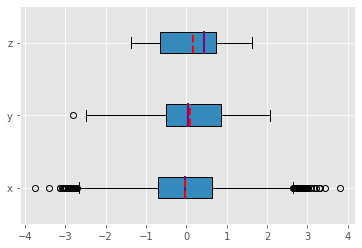

In [122]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,           labels=('x', 'y', 'z'), patch_artist=True,           medianprops={'linewidth': 2, 'color': 'purple'},           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

In [123]:
hist, bin_edges = np.histogram(x, bins=10)
hist 

array([  10,  110,  579, 1710, 2833, 2688, 1479,  487,   97,    7],
      dtype=int64)

In [124]:
bin_edges

array([-3.74010064, -2.98592455, -2.23174847, -1.47757238, -0.7233963 ,
        0.03077979,  0.78495587,  1.53913196,  2.29330804,  3.04748413,
        3.80166021])

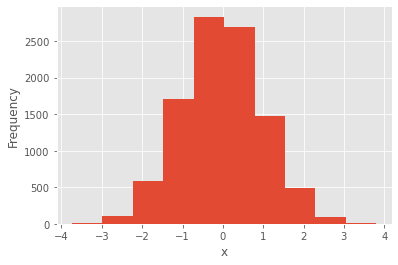

In [125]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

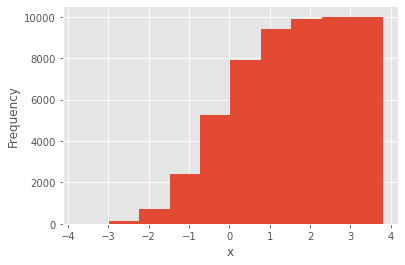

In [126]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

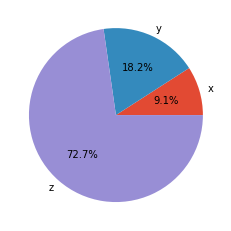

In [128]:
x, y, z = 128, 256, 1024
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

In [129]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

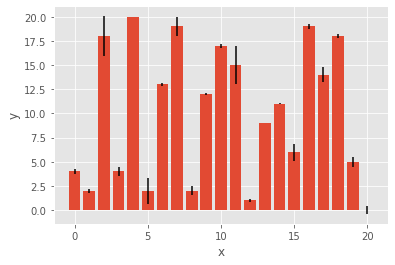

In [130]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [131]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)

Regression line: y=5.23+2.00x, r=0.99


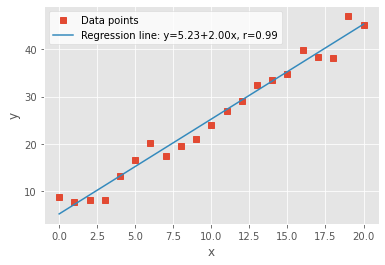

In [132]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

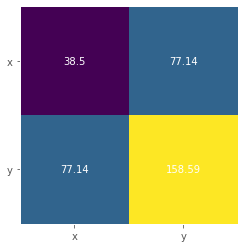

In [133]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):    
  for j in range(2):        
    ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()